In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
def read_accuracy_file(synthesis_results_file, format, clock):
    lines = []
    with open(synthesis_results_file) as screen_outputs:
        lines = screen_outputs.readlines()

    # Obtain resources
    resources = dict.fromkeys(
        ['LUTs', 'FFs', 'DSPs', 'BRAMs', 'Frequency', 'Cycles'], 0)
    clock = str(clock)
    read = False
    for line in lines:
        if (format in line) and (clock in line):
            read = True
        elif '---' in line:
            read = False
        if read:
            if line[:3] == "LUT":
                resources['LUTs'] = (int(line[6:-1]))
            elif line[:2] == "FF":
                resources['FFs'] = (int(line[5:-1]))
            elif line[:3] == "DSP":
                resources['DSPs'] = (int(line[6:-1]))
            elif line[:8] == "BRAM_18K":
                resources['BRAMs'] = (int(line[11:-1]))
            elif line[:17] == "Clock Period (ns)":
                resources['Frequency'] = (1000/float(line[20:-1]))
            elif line[:16] == "Latency (cycles)":
                resources['Cycles'] = (int(line[19:-1]))

    return resources

In [3]:

def plot_results(benchmark_name, all=False):
    fig, axs = plt.subplots(nrows=2,
                            ncols=2+all,
                            figsize=(10, 6))

    # colors = ['#a6cee3', '#1f78b4', '#fdbf6f', '#ff7f00', '#b2df8a', '#33a02c']
    # colors = (mpl.colormaps['tab10']).colors
    # colors = ['#a1cee2', '#0078b1', '#ffbf76', '#ff7f27', '#aedf8f', '#12a037']
    # markers = ['o', 'v', 'o', 'v', 'o', 'v']
    # formats = ['float32', 'float64',
    #            'posit32', 'posit64']

    colors = ['#79B1D3', '#FEAF53', '#1f78b4', '#ff7f00']
    markers = ['o', 'o', 'v', 'v']
    formats = ['float32', 'posit32',
               'float64', 'posit64']

    for i, format in enumerate(formats):
        luts_list = []
        ffs_list = []
        dsps_list = []
        brams_list = []
        frequency_list = []
        cycles_list = []
        target_list = []

        # for period in [20, 10, 6.66667, 5, 4, 3.3333]:
        for period in [20, 10, 6.6667, 5, 4, 3.333]:
            # df = read_accuracy_file(
            #     '../Vitis_HLS/' + benchmark_name + '/' + format + '/results_' + str(period) + '.txt')
            df = read_accuracy_file(
                '../Vitis_HLS/' + benchmark_name + '/results.txt', format, period)

            luts_list.append(df['LUTs'])
            ffs_list.append(df['FFs'])
            dsps_list.append(df['DSPs'])
            brams_list.append(df['BRAMs'])
            frequency_list.append(df['Frequency'])
            cycles_list.append(df['Cycles'])
            target_list.append(round(1000/period))

        # plot
        axs[0, 0].plot(target_list, luts_list, label=format,
                       color=colors[i], marker=markers[i])
        axs[0, 1].plot(target_list, ffs_list, label=format,
                       color=colors[i], marker=markers[i])
        axs[1, 0].plot(target_list, frequency_list,
                       label=format, color=colors[i], marker=markers[i])
        axs[1, 1].plot(target_list, cycles_list, label=format,
                       color=colors[i], marker=markers[i])
        if (all):
            axs[0, 2].plot(target_list, dsps_list,
                           label=format, color=colors[i], marker=markers[i])
            axs[1, 2].plot(target_list, brams_list,
                           label=format, color=colors[i], marker=markers[i])

    # Labels
    axs[0, 0].set_ylabel('LUTs')
    axs[0, 1].set_ylabel('FFs')
    axs[1, 0].set_ylabel('Max Frequency (MHz)')
    axs[1, 1].set_ylabel('Latency (cycles)')
    axs[1, 0].set_xlabel('Target Frequency (MHz)')
    axs[1, 1].set_xlabel('Target Frequency (MHz)')
    if (all):
        axs[0, 2].set_ylabel('DSPs')
        axs[1, 2].set_ylabel('BRAMs')
        axs[1, 2].set_xlabel('Target Frequency (MHz)')

    # Grid
    axs[0, 0].grid(zorder=0, )  # axis='y')
    axs[0, 1].grid(zorder=0, )  # axis='y')
    axs[1, 0].grid(zorder=0, )  # axis='y')
    axs[1, 1].grid(zorder=0, )  # axis='y')
    if (all):
        axs[0, 2].grid(zorder=0, )  # axis='y')
        axs[1, 2].grid(zorder=0, )  # axis='y')

    # Show target frequencies
    axs[1, 0].set_ylim(bottom=50)  # , top=300)
    lim = axs[1, 0].get_ylim()
    x_lim = axs[1, 0].get_xlim()
    axs[1, 0].plot(lim, lim,
                   color='tab:gray',
                   linestyle='--',
                   linewidth=1,
                   zorder=0)
    axs[1, 0].set_xlim(x_lim)

    # Adjust the spacing between the subplots
    fig.tight_layout()

    # Create a legend object for all subplots
    fig.legend(list(map(str.title, formats)), title='Format',
               loc='upper center', bbox_to_anchor=(0.5, 1.08),
               ncol=len(formats))

    plt.savefig('vitis_' + benchmark_name +
                '_synthesis.pdf', bbox_inches='tight')

    plt.show()

## Addition

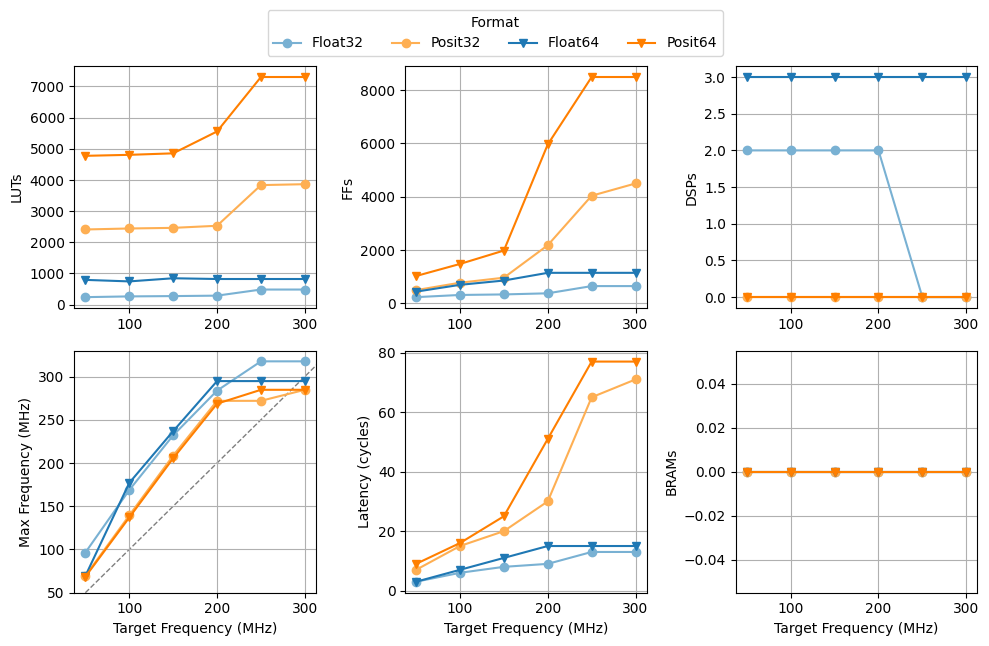

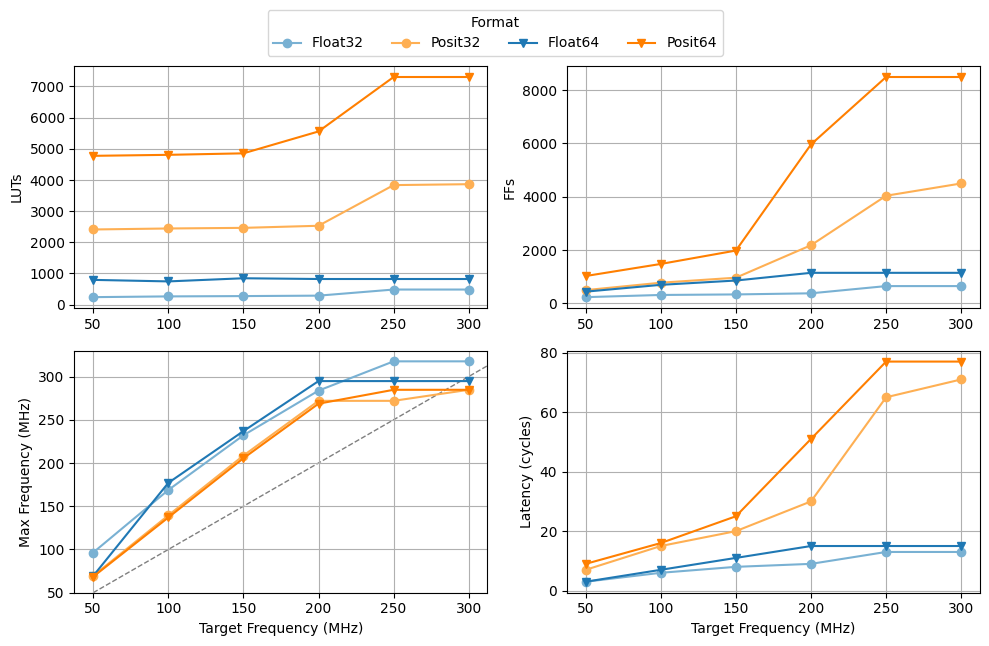


50 ns
[240, 2411, 794, 4774]
[231, 494, 437, 1024]
[96.44131545954286, 69.43962224845497, 69.37699458859443, 68.4931506849315]
[3, 7, 3, 9]

100 ns
[264, 2443, 745, 4806]
[313, 773, 693, 1477]
[168.74789065136684, 139.41168269901019, 176.99115044247787, 136.986301369863]
[6, 15, 7, 16]

150 ns
[274, 2463, 846, 4854]
[333, 961, 855, 1980]
[232.01856148491882, 208.55057351407717, 236.85457129322594, 205.4653790836244]
[8, 20, 11, 25]

200 ns
[288, 2530, 822, 5556]
[375, 2180, 1144, 5964]
[283.68794326241135, 271.88689505165854, 294.7244326554672, 268.6005909213]
[9, 30, 15, 51]

250 ns
[484, 3835, 822, 7303]
[646, 4038, 1144, 8495]
[317.56113051762463, 271.88689505165854, 294.7244326554672, 284.6569883290635]
[13, 65, 15, 77]

300 ns
[484, 3864, 822, 7303]
[646, 4499, 1144, 8495]
[317.56113051762463, 284.6569883290635, 294.7244326554672, 284.6569883290635]
[13, 71, 15, 77]


In [14]:
benchmark_name = 'add'

plot_results(benchmark_name, all=True)
plot_results(benchmark_name)
# plot_results_all(benchmark_name)


for period in [20, 10, 6.6667, 5, 4, 3.333]:
    luts_list = []
    ffs_list = []
    dsps_list = []
    brams_list = []
    frequency_list = []
    cycles_list = []

    for format in ['float32', 'posit32', 'float64', 'posit64']:
        df = read_accuracy_file(
                '../Vitis_HLS/' + benchmark_name + '/results.txt', format, period)
        luts_list.append(df['LUTs'])
        ffs_list.append(df['FFs'])
        dsps_list.append(df['DSPs'])
        brams_list.append(df['BRAMs'])
        frequency_list.append(df['Frequency'])
        cycles_list.append(df['Cycles'])


    print(f'\n{round(1000/period)} ns')
    # print(frequency_list)
    for list_r in [luts_list, ffs_list, frequency_list, cycles_list]:
        # print(list_r[1]/list_r[0], list_r[3]/list_r[2])
        print(list_r)

## Multiplication

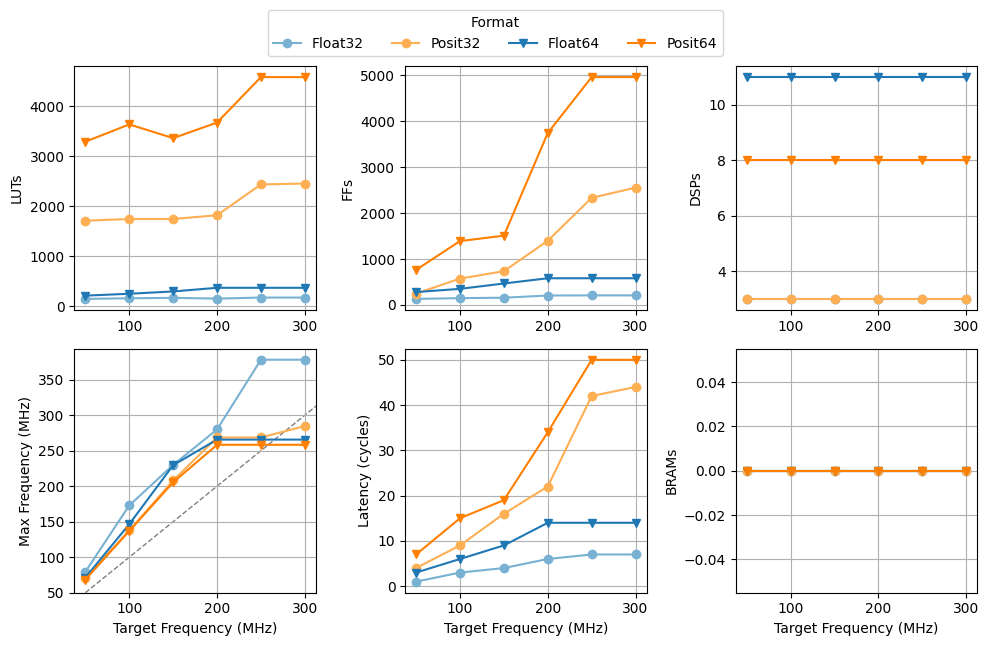

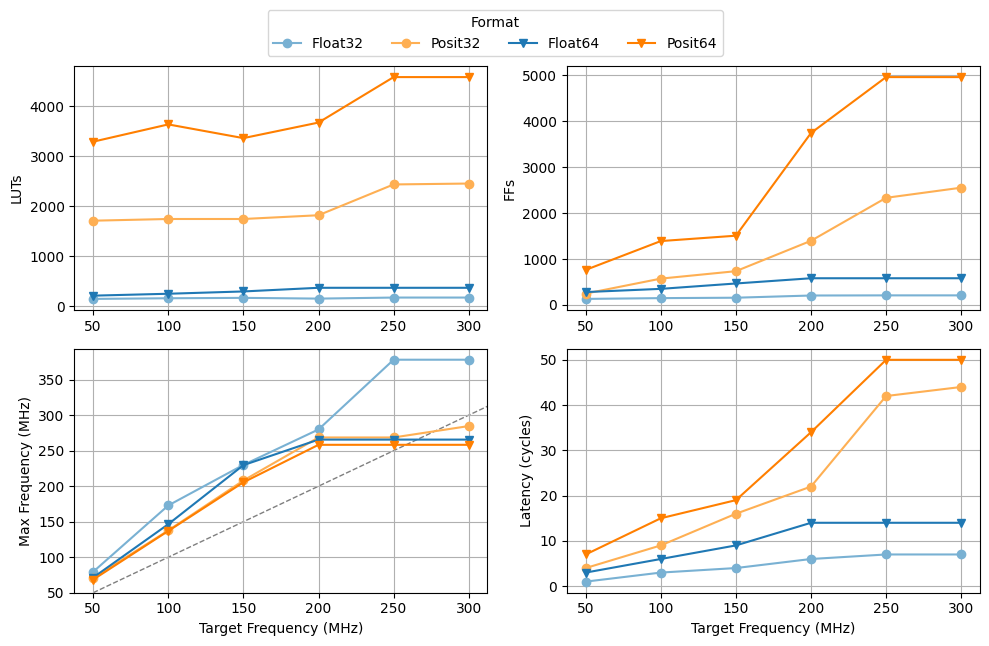


50 ns
[148, 1710, 213, 3288]
[130, 246, 279, 762]
[79.46598855689766, 70.70635650144948, 71.35721421435707, 68.4931506849315]
[3, 3, 11, 8]
[1, 4, 3, 7]

100 ns
[161, 1744, 251, 3633]
[147, 572, 349, 1390]
[172.89073305670817, 137.68415255404102, 146.4986815118664, 136.986301369863]
[3, 3, 11, 8]
[3, 9, 6, 15]

150 ns
[169, 1744, 297, 3359]
[156, 734, 466, 1507]
[229.9908003679853, 208.02995631370916, 229.62112514351318, 205.4653790836244]
[3, 3, 11, 8]
[4, 16, 9, 19]

200 ns
[154, 1819, 370, 3670]
[204, 1396, 580, 3744]
[279.87685418415896, 268.6005909213, 265.6042496679947, 258.26446280991735]
[3, 3, 11, 8]
[6, 22, 14, 34]

250 ns
[175, 2434, 370, 4578]
[207, 2332, 580, 4962]
[378.0718336483932, 268.6005909213, 265.6042496679947, 258.26446280991735]
[3, 3, 11, 8]
[7, 42, 14, 50]

300 ns
[175, 2452, 370, 4578]
[207, 2553, 580, 4962]
[378.0718336483932, 284.6569883290635, 265.6042496679947, 258.26446280991735]
[3, 3, 11, 8]
[7, 44, 14, 50]


In [12]:
benchmark_name = 'mult'

plot_results(benchmark_name, all=True)
plot_results(benchmark_name)

# # Caution! DSPs used in this op.

# for format in ['float32', 'posit32', 'float64', 'posit64']:
#     dsps_list = []
#     for period in [20, 10, 6.6667, 5, 4, 3.333]:
#         df = read_accuracy_file(
#             '../Vitis_HLS/mult/results.txt', format, period)
#         dsps_list.append(df['DSPs'])

#     print(format)
#     print(dsps_list)

for period in [20, 10, 6.6667, 5, 4, 3.333]:
    luts_list = []
    ffs_list = []
    dsps_list = []
    brams_list = []
    frequency_list = []
    cycles_list = []

    for format in ['float32', 'posit32', 'float64', 'posit64']:
        df = read_accuracy_file(
                '../Vitis_HLS/' + benchmark_name + '/results.txt', format, period)
        luts_list.append(df['LUTs'])
        ffs_list.append(df['FFs'])
        dsps_list.append(df['DSPs'])
        brams_list.append(df['BRAMs'])
        frequency_list.append(df['Frequency'])
        cycles_list.append(df['Cycles'])


    print(f'\n{round(1000/period)} ns')
    # print(frequency_list)
    for list_r in [luts_list, ffs_list, frequency_list, dsps_list, cycles_list]:
        # print(list_r[1]/list_r[0], list_r[3]/list_r[2])
        print(list_r)